<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/Lab_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB-9**
  EDA on airline_tweets.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/airline_tweets.csv")

In [ ]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

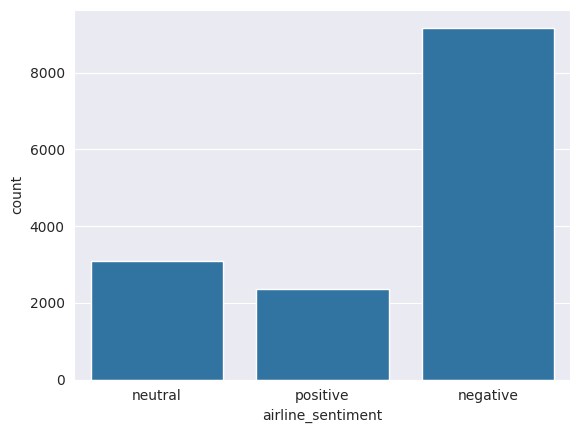

In [ ]:
sns.countplot(data=df, x="airline_sentiment");

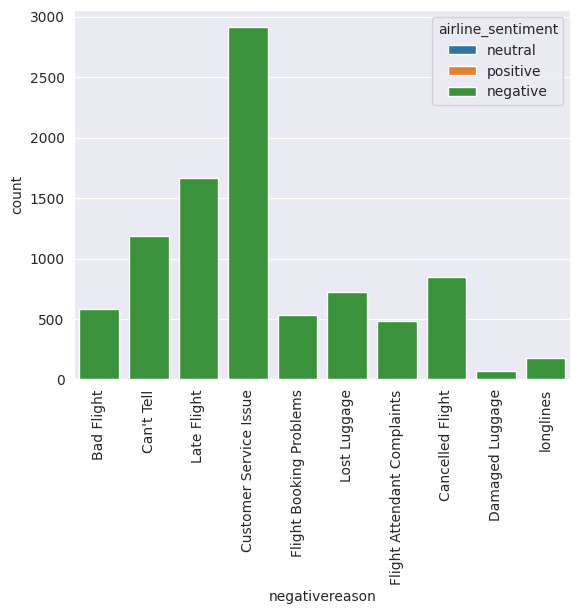

In [ ]:
sns.countplot(data=df, x='negativereason', hue='airline_sentiment');
plt.xticks(rotation=90)
plt.show()

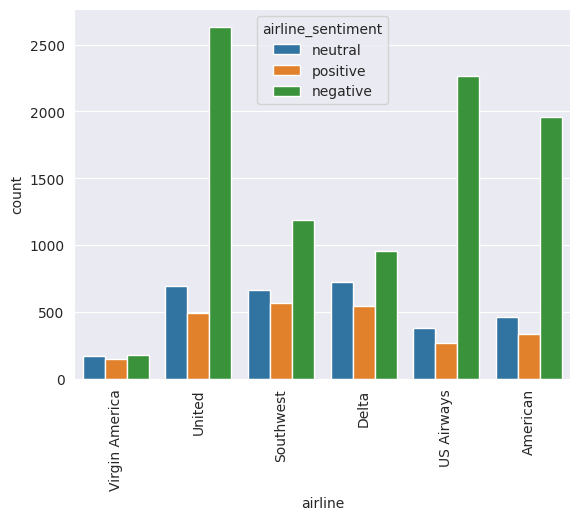

In [ ]:
sns.countplot(data=df, x='airline', hue='airline_sentiment');
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = df[["text", "airline_sentiment"]]
data.head()

text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(data[data["airline_sentiment"] == 'negative']['text'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print("Top 20 words used for Negative Reviews")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative Reviews
[('flight', 2943), ('united', 2899), ('usairways', 2375), ('americanair', 2110), ('southwestair', 1214), ('jetblue', 1052), ('cancelled', 926), ('service', 750), ('hours', 649), ('just', 622), ('help', 619), ('customer', 614), ('hold', 614), ('time', 598), ('plane', 532), ('delayed', 508), ('amp', 503), ('hour', 452), ('flightled', 448), ('http', 437)]


## Naive Bayes Classifier


In [ ]:
X = data['text']
y = data['airline_sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
## Import our Classifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test_tfidf)

In [ ]:
y_pred

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [ ]:
y_test

4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
11765    negative
14156    negative
10963     neutral
4877      neutral
5206     negative
Name: airline_sentiment, Length: 2928, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Accuracy: 69.88%


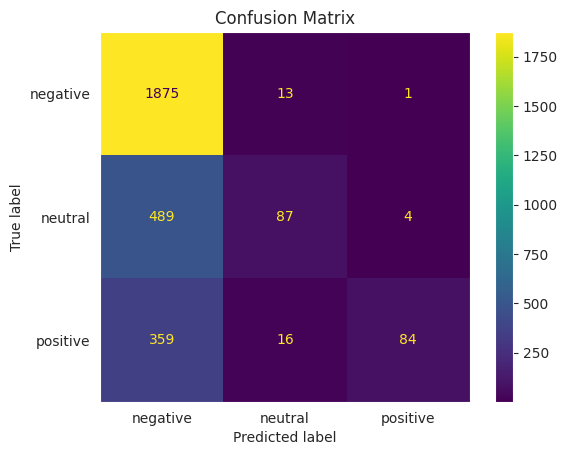

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
disp = ConfusionMatrixDisplay(conf_mat, display_labels=nb.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix")
plt.grid(False)

##**EDA ON MOVIE_REVIEWS.CSV DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df2=pd.read_csv("/content/movie_reviews.csv")

In [ ]:
df2.head()

label                                             review
0   neg  how do films like mouse hunt get into theatres...
1   neg  some talented actresses are blessed with a dem...
2   pos  this has been an extraordinary year for austra...
3   pos  according to hollywood movies made in last few...
4   neg  my first press screening of 1998 and already i...

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
df2.isnull().sum()

label      0
review    35
dtype: int64

In [ ]:
df2['label'].value_counts()

label
neg    1000
pos    1000
Name: count, dtype: int64

In [ ]:
df2.dropna(subset=['review'], inplace=True)

In [ ]:
df2.isnull().sum()

label     0
review    0
dtype: int64

In [ ]:
df2['label'].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

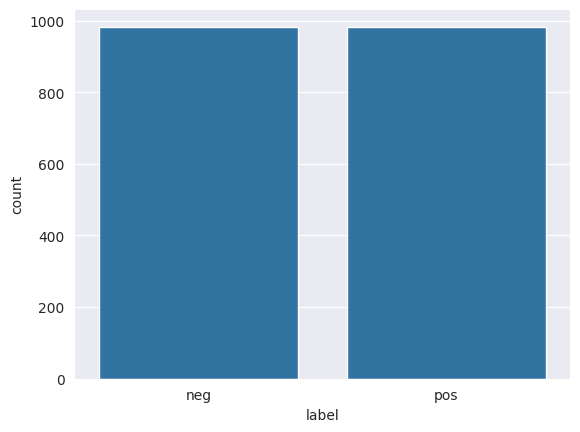

In [ ]:
sns.countplot(data=df2, x="label");

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(df2[df2["label"] == 'neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print("Top 20 words used for Negative Reviews")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative Reviews
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


## NAIVE BAYES CLASSIFIER

In [ ]:
X=df2['review']
y=df2['label']

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_auc_score, roc_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)


best_nb = grid_search.best_estimator_

In [ ]:
y_pred = best_nb.predict(X_test_tfidf)
# Results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'alpha': 2.0}
Best Accuracy: 79.90%

Classification Report:
               precision    recall  f1-score   support

         neg       0.79      0.83      0.81       202
         pos       0.81      0.77      0.79       191

    accuracy                           0.80       393
   macro avg       0.80      0.80      0.80       393
weighted avg       0.80      0.80      0.80       393



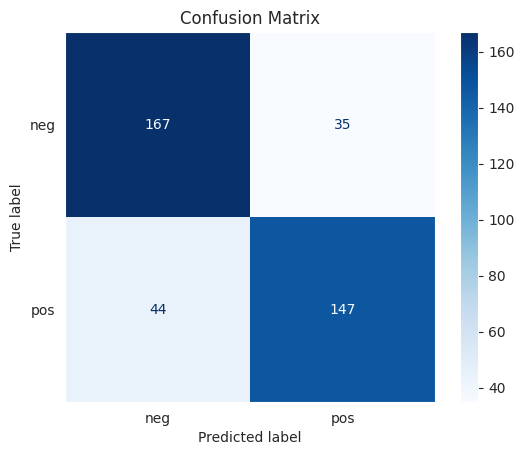

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

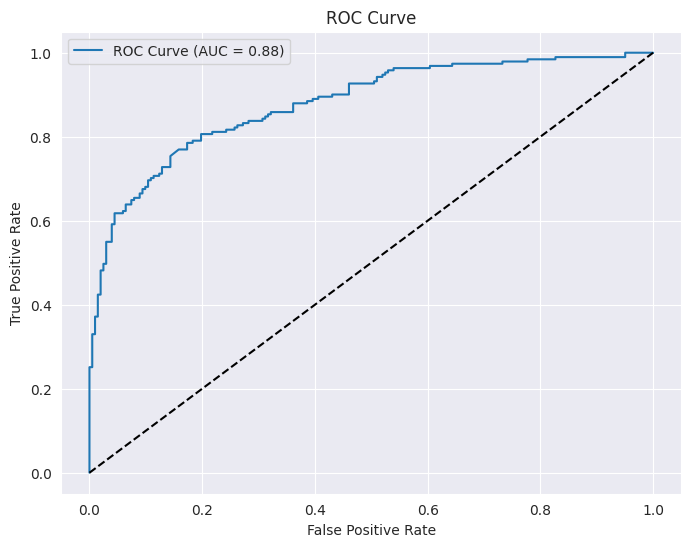

In [ ]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_prob = best_nb.predict_proba(X_test_tfidf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


##**LAB-10 (LINEAR REGRESSION)**

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

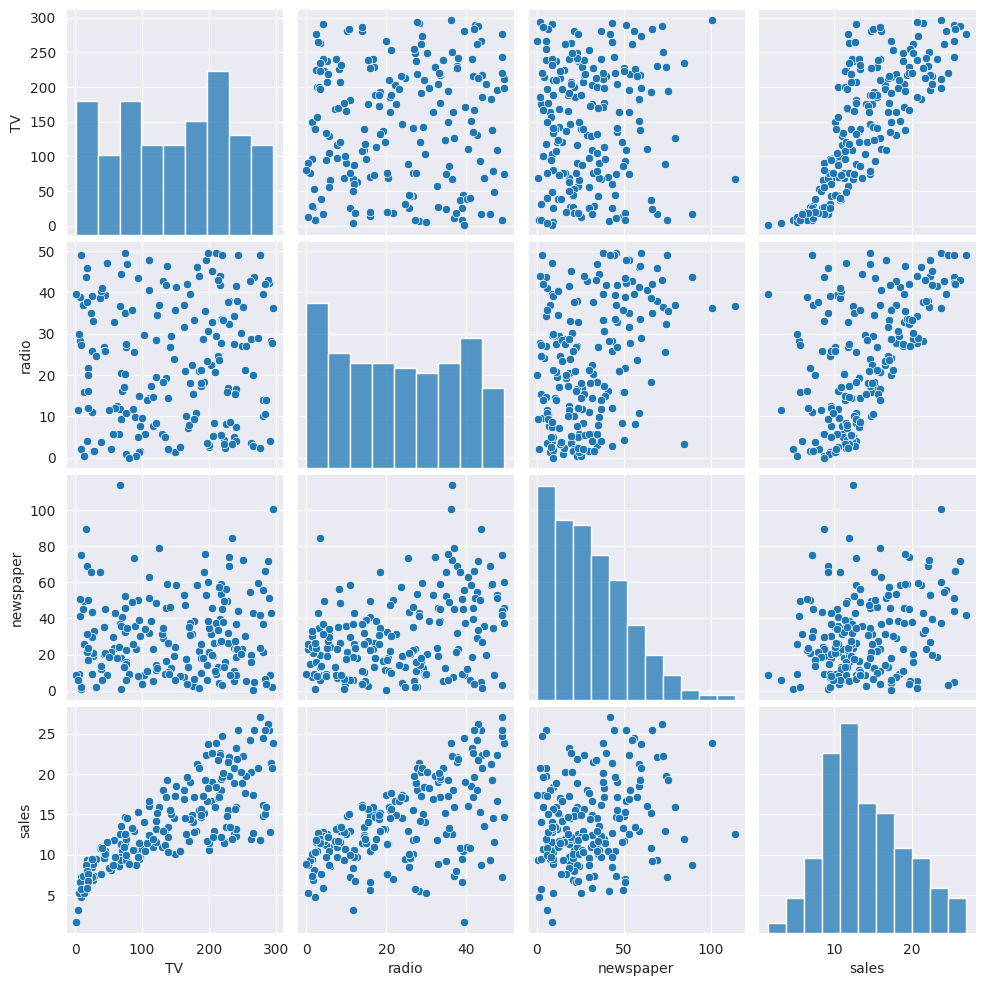

In [ ]:
sns.pairplot(df)

In [ ]:
df['total_spend']= df['TV']+df['radio']+df['newspaper']

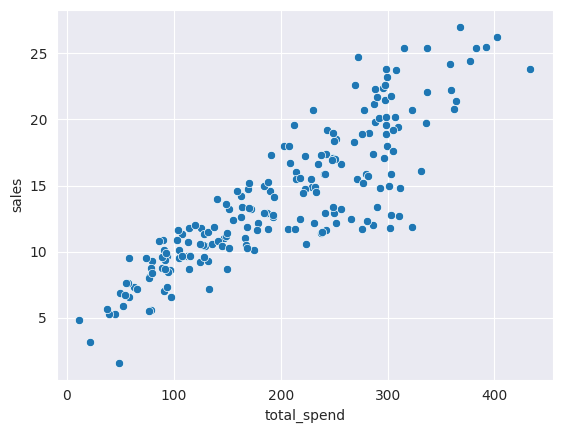

In [ ]:
sns.scatterplot(data=df, x='total_spend', y='sales');

In [ ]:
X = df.drop(['sales', 'total_spend'], axis=1)
y = df['sales']

In [ ]:
X.shape

(200, 3)

In [ ]:
y.shape

(200,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 1.46


In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 1.78


In [ ]:
# -1,1
r_sq = r2_score(y_test, y_pred)
print(f"R-squared: {r_sq*100:.2f}")

R-squared: 89.94


In [ ]:
X_test['total_spend'] = X_test['TV'] + X_test['radio'] + X_test['newspaper']

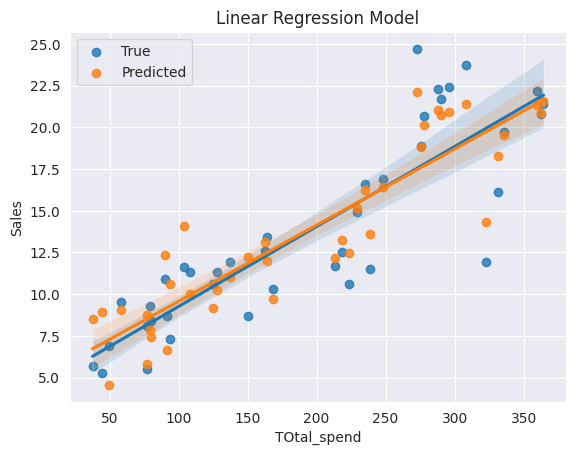

In [ ]:
sns.regplot(x=X_test['total_spend'] , y=y_test, label='True');
sns.regplot(x=X_test['total_spend'] , y=y_pred, label='Predicted');
plt.legend()
plt.xlabel('TOtal_spend')
plt.ylabel('Sales')
plt.title('Linear Regression Model')
plt.show()

## **LR on “social_anxiety_dataset.csv”**

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
df3=pd.read_csv("/content/social_anxiety_dataset.csv")
df3.head()

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   29  Female     Artist          6.0                           2.7   
1   46   Other      Nurse          6.2                           5.7   
2   64    Male      Other          5.0                           3.7   
3   20  Female  Scientist          5.8                           2.8   
4   49  Female      Other          8.2                           2.3   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       181                                 10     Yes   
1                       200                                  8     Yes   
2                       117                                  4      No   
3                       360                                  6     Yes   
4                       247                                  4     Yes   

  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                        No                   10               114   
1                       Yes                    1                62   
2                       Yes                    1                91   
3                        No                    4                86   
4                        No                    1                98   

   Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness Medication  \
0                            14                     4        No        Yes   
1                            23                     2       Yes         No   
2                            28                     3        No         No   
3                            17                     3        No         No   
4                            19                     4       Yes        Yes   

   Therapy Sessions (per month) Recent Major Life Event  Diet Quality (1-10)  \
0                             3                     Yes                    7   
1                             2                      No                    8   
2                             1                     Yes                    1   
3                             0                      No                    1   
4                             1                      No                    3   

   Anxiety Level (1-10)  
0                   5.0  
1                   3.0  
2                   1.0  
3                   2.0  
4                   1.0

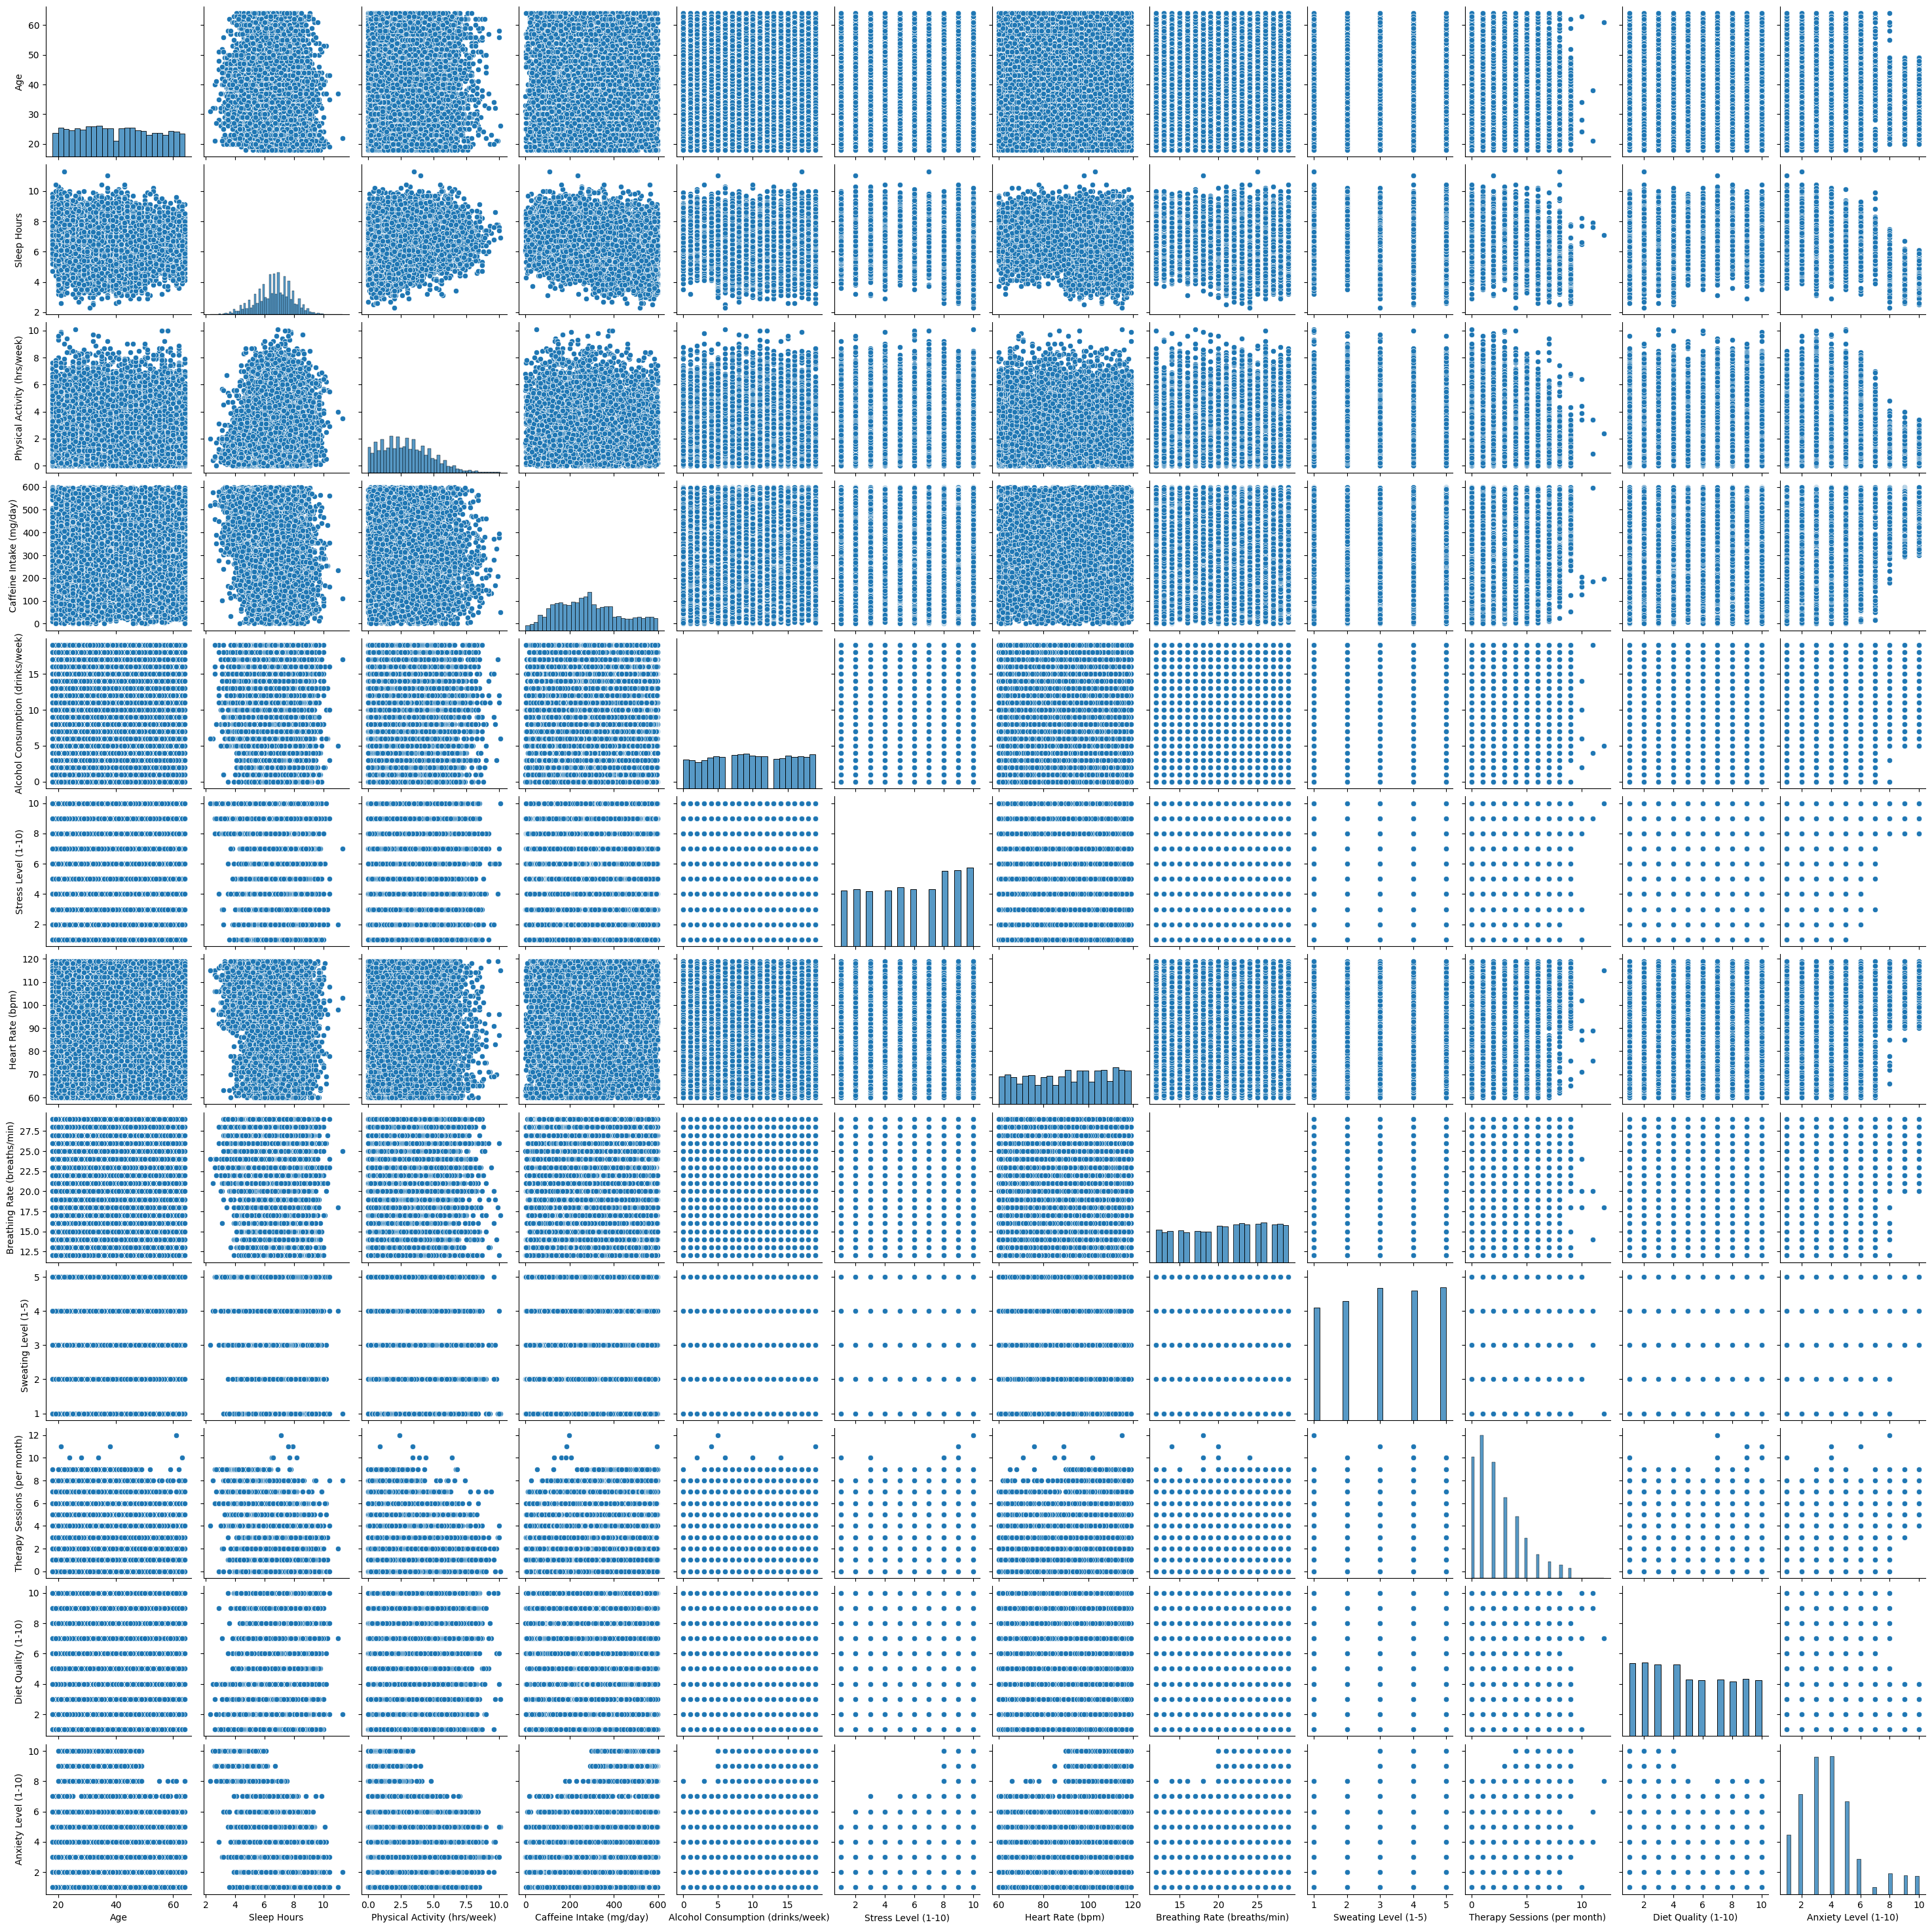

In [4]:
sns.pairplot(df3)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [24]:
print("\nMissing Values:\n")
print(df3.isnull().sum())

print("\nStatistical Summary:\n")
print(df3.describe())


Missing Values:

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

Statistical Summary:

                Age   Sleep Hours  Physical Activity (hrs/week)  \
count  11000.000000  11000.000000                  11000.000000   
mean      40.241727      6.650691                      2.942136   
std 

In [25]:
# 3. Data Preprocessing
# Label encode categorical features
cat_cols = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
            'Dizziness', 'Medication', 'Recent Major Life Event']

le = LabelEncoder()
for col in cat_cols:
    df3[col] = le.fit_transform(df3[col].astype(str))


In [26]:
# Detecting Outliers (Using IQR method)
numerical_cols = df3.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Gender: 0 outliers
Occupation: 0 outliers
Sleep Hours: 110 outliers
Physical Activity (hrs/week): 56 outliers
Caffeine Intake (mg/day): 0 outliers
Alcohol Consumption (drinks/week): 0 outliers
Smoking: 0 outliers
Family History of Anxiety: 0 outliers
Stress Level (1-10): 0 outliers
Heart Rate (bpm): 0 outliers
Breathing Rate (breaths/min): 0 outliers
Sweating Level (1-5): 0 outliers
Dizziness: 0 outliers
Medication: 0 outliers
Therapy Sessions (per month): 178 outliers
Recent Major Life Event: 0 outliers
Diet Quality (1-10): 0 outliers
Anxiety Level (1-10): 322 outliers


In [27]:
# 4. Feature Scaling
scaler = StandardScaler()
features = df3.drop('Anxiety Level (1-10)', axis=1)
target = df3['Anxiety Level (1-10)']

features_scaled = scaler.fit_transform(features)

In [28]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# 6. Apply Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [29]:

# 7. Evaluate the model
y_pred = lr.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Model Evaluation:
Mean Absolute Error (MAE): 0.90
Root Mean Squared Error (RMSE): 1.12
R-squared (R2 Score): 0.73


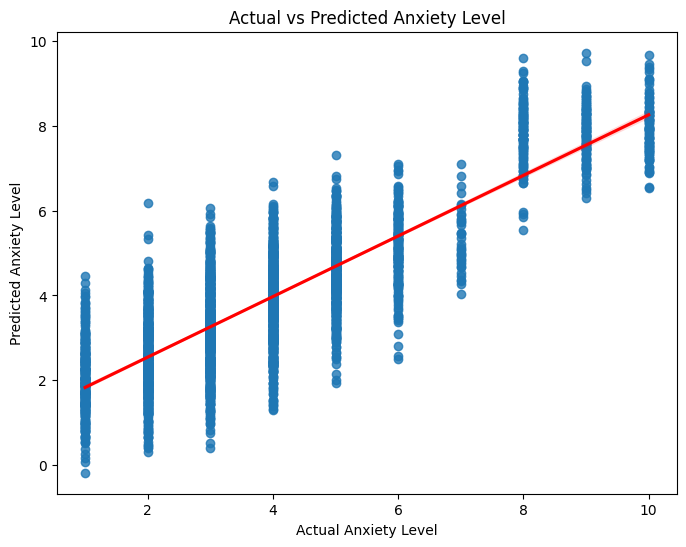

In [31]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"red"})
plt.xlabel('Actual Anxiety Level')
plt.ylabel('Predicted Anxiety Level')
plt.title('Actual vs Predicted Anxiety Level')
plt.show()
